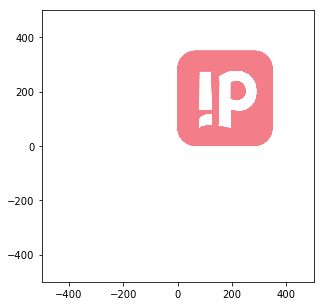

In [4]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

img = Image.open('ibotta-app-icon.png')

plt.figure(figsize=(5,5))
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.imshow(np.asarray(img))
plt.show()

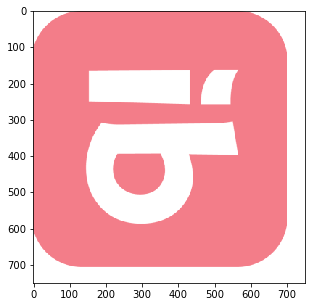

In [5]:
# recenter resultant image
T_pos1000 = np.array([  
    [1, 0, 350],
    [0, 1, 350],
    [0, 0, 1]])
# rotate - opposite angle
T_rotate = np.array([  
    [0, -1, 0],
    [1, 0, 0],
    [0, 0, 1]])
# scale
T_scale = np.array([  
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]])
# center original to 0,0
T_neg500 = np.array([  
    [1, 0, -175],
    [0, 1, -175],
    [0, 0, 1]])
T = T_pos1000 @ T_rotate @ T_scale @ T_neg500  
T_inv = np.linalg.inv(T) 

img_transformed = img.transform((750, 750), Image.AFFINE, data=T_inv.flatten()[:6], resample=Image.NEAREST)

width, height = img_transformed.size
for x in range(width):
    for y in range(height):
        r,g,b = img_transformed.getpixel((x,y))
        if r == 0 and g == 0 and b == 0:
            img_transformed.putpixel((x,y), (255, 255, 255))

plt.figure(figsize=(5,5))
plt.imshow(np.asarray(img_transformed)) 
plt.show()